In [3]:
!ls -lh './data'

total 24
-rw-r--r--@ 1 ys  staff   3.7K Jan 25 18:27 edges.csv
-rw-r--r--@ 1 ys  staff   1.2K Jan 25 18:27 gen_data.py
-rw-r--r--@ 1 ys  staff   461B Jan 25 18:27 nodes.csv


In [5]:
import pandas as pd

nodes_data = pd.read_csv('./data/nodes.csv')
print(nodes_data)

    Id     Club  Age
0    0   Mr. Hi   45
1    1   Mr. Hi   33
2    2   Mr. Hi   36
3    3   Mr. Hi   31
4    4   Mr. Hi   41
5    5   Mr. Hi   42
6    6   Mr. Hi   48
7    7   Mr. Hi   41
8    8   Mr. Hi   30
9    9  Officer   35
10  10   Mr. Hi   38
11  11   Mr. Hi   44
12  12   Mr. Hi   37
13  13   Mr. Hi   39
14  14  Officer   36
15  15  Officer   38
16  16   Mr. Hi   47
17  17   Mr. Hi   45
18  18  Officer   41
19  19   Mr. Hi   31
20  20  Officer   31
21  21   Mr. Hi   44
22  22  Officer   42
23  23  Officer   32
24  24  Officer   30
25  25  Officer   50
26  26  Officer   30
27  27  Officer   43
28  28  Officer   48
29  29  Officer   40
30  30  Officer   39
31  31  Officer   45
32  32  Officer   47
33  33  Officer   33


In [6]:
edges_data = pd.read_csv('./data/edges.csv')
print(edges_data)

     Src  Dst    Weight
0      0    1  0.318451
1      0    2  0.551215
2      0    3  0.227416
3      0    4  0.266919
4      0    5  0.475449
..   ...  ...       ...
151   33   28  0.266479
152   33   29  0.279901
153   33   30  0.652154
154   33   31  0.828536
155   33   32  0.842656

[156 rows x 3 columns]


In [7]:
import dgl

src = edges_data['Src'].to_numpy()
dst = edges_data['Dst'].to_numpy()

In [8]:
src

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  3,  3,  3,  3,  3,  3,  4,  4,  4,  5,  5,  5,  5,  6,  6,  6,
        6,  7,  7,  7,  7,  8,  8,  8,  8,  8,  9,  9, 10, 10, 10, 11, 12,
       12, 13, 13, 13, 13, 13, 14, 14, 15, 15, 16, 16, 17, 17, 18, 18, 19,
       19, 19, 20, 20, 21, 21, 22, 22, 23, 23, 23, 23, 23, 24, 24, 24, 25,
       25, 25, 26, 26, 27, 27, 27, 27, 28, 28, 28, 29, 29, 29, 29, 30, 30,
       30, 30, 31, 31, 31, 31, 31, 31, 32, 32, 32, 32, 32, 32, 32, 32, 32,
       32, 32, 32, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33,
       33, 33, 33])

In [10]:
dst

array([ 1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 17, 19, 21, 31,  0,
        2,  3,  7, 13, 17, 19, 21, 30,  0,  1,  3,  7,  8,  9, 13, 27, 28,
       32,  0,  1,  2,  7, 12, 13,  0,  6, 10,  0,  6, 10, 16,  0,  4,  5,
       16,  0,  1,  2,  3,  0,  2, 30, 32, 33,  2, 33,  0,  4,  5,  0,  0,
        3,  0,  1,  2,  3, 33, 32, 33, 32, 33,  5,  6,  0,  1, 32, 33,  0,
        1, 33, 32, 33,  0,  1, 32, 33, 25, 27, 29, 32, 33, 25, 27, 31, 23,
       24, 31, 29, 33,  2, 23, 24, 33,  2, 31, 33, 23, 26, 32, 33,  1,  8,
       32, 33,  0, 24, 25, 28, 32, 33,  2,  8, 14, 15, 18, 20, 22, 23, 29,
       30, 31, 33,  8,  9, 13, 14, 15, 18, 19, 20, 22, 23, 26, 27, 28, 29,
       30, 31, 32])

In [11]:
g = dgl.graph((src, dst))

In [12]:
print(g)

Graph(num_nodes=34, num_edges=156,
      ndata_schemes={}
      edata_schemes={})


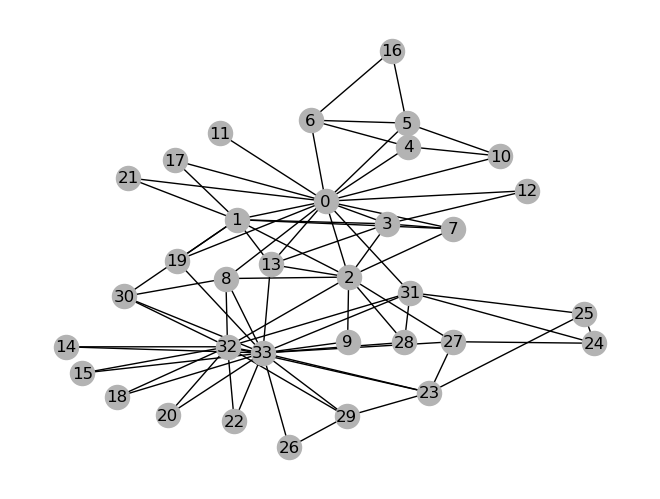

In [15]:
import networkx as nx

nx_g = g.to_networkx().to_undirected()

pos = nx.kamada_kawai_layout(nx_g)
nx.draw(nx_g, pos, with_labels=True, node_color=[[.7,.7,.7]])

In [16]:
print('#Nodes', g.number_of_nodes())
print('#Edges', g.number_of_edges())

#Nodes 34
#Edges 156


In [18]:
g.in_degree(1)

/Users/ys/opt/anaconda3/lib/python3.9/site-packages/dgl/heterograph.py:3432: DGLWarning: DGLGraph.in_degree is deprecated. Please use DGLGraph.in_degrees
  dgl_warning("DGLGraph.in_degree is deprecated. Please use DGLGraph.in_degrees")


9

In [19]:
g.successors(0)

tensor([ 1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 17, 19, 21, 31])

In [20]:
# age - 정수형 특성, Club - 범주형 특성(각 멤버가 어떤 커뮤니티에 속해 있는지)
# Weight - 부동 소수점 수치형 데이터(각 관계의 강도)

In [21]:
import torch
import torch.nn.functional as F

# '나이' 노드 피처
age = torch.tensor(nodes_data['Age'].to_numpy()).float() / 100
print(age)

tensor([0.4500, 0.3300, 0.3600, 0.3100, 0.4100, 0.4200, 0.4800, 0.4100, 0.3000,
        0.3500, 0.3800, 0.4400, 0.3700, 0.3900, 0.3600, 0.3800, 0.4700, 0.4500,
        0.4100, 0.3100, 0.3100, 0.4400, 0.4200, 0.3200, 0.3000, 0.5000, 0.3000,
        0.4300, 0.4800, 0.4000, 0.3900, 0.4500, 0.4700, 0.3300])


In [22]:
age[[0,10]]

tensor([0.4500, 0.3800])

In [23]:
g.ndata['age'] = age
print(g)

Graph(num_nodes=34, num_edges=156,
      ndata_schemes={'age': Scheme(shape=(), dtype=torch.float32)}
      edata_schemes={})


In [24]:
# "Club" 칼럼은 각 노드가 어떤 커뮤니티에 포함되어 있는지를 나타냅니다
# 입력 값은 스트링 타입으로, 범주형 정수 값 혹은 원핫 인코딩 값으로 바꾸어 주어야 합니다
club = nodes_data['Club'].to_list()

In [25]:
# 범주형 정수 값으로 바꿔줍니다. 'Mr. Hi'는 0으로, 'Officer'는 1로.
club = torch.tensor([c == 'Officer' for c in club]).long()

In [26]:
club_onehot = F.one_hot(club)
print(club_onehot)

tensor([[1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [0, 1],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [0, 1],
        [0, 1],
        [1, 0],
        [1, 0],
        [0, 1],
        [1, 0],
        [0, 1],
        [1, 0],
        [0, 1],
        [0, 1],
        [0, 1],
        [0, 1],
        [0, 1],
        [0, 1],
        [0, 1],
        [0, 1],
        [0, 1],
        [0, 1],
        [0, 1],
        [0, 1]])


In [28]:
g.ndata.update({'club':club, 'club_onehot':club_onehot})

del g.ndata['age']
print(g)

Graph(num_nodes=34, num_edges=156,
      ndata_schemes={'club': Scheme(shape=(), dtype=torch.int64), 'club_onehot': Scheme(shape=(2,), dtype=torch.int64)}
      edata_schemes={})


In [36]:
edge_weight = torch.tensor(edges_data['Weight'].to_numpy())
g.edata['weight'] = edge_weight
print(g)

Graph(num_nodes=34, num_edges=156,
      ndata_schemes={'club': Scheme(shape=(), dtype=torch.int64), 'club_onehot': Scheme(shape=(2,), dtype=torch.int64)}
      edata_schemes={'weight': Scheme(shape=(), dtype=torch.float64)})


In [37]:
g.srcdata['src_h'] = torch.rand(34,4)
g.dstdata['dst_h'] = torch.randn(34,7)
print(g)

Graph(num_nodes=34, num_edges=156,
      ndata_schemes={'club': Scheme(shape=(), dtype=torch.int64), 'club_onehot': Scheme(shape=(2,), dtype=torch.int64), 'src_h': Scheme(shape=(4,), dtype=torch.float32), 'dst_h': Scheme(shape=(7,), dtype=torch.float32)}
      edata_schemes={'weight': Scheme(shape=(), dtype=torch.float64)})


In [38]:
print(g.ndata['src_h'])

tensor([[0.7510, 0.3992, 0.3870, 0.8752],
        [0.5396, 0.2800, 0.9881, 0.5484],
        [0.1133, 0.3206, 0.9195, 0.4780],
        [0.8412, 0.8920, 0.3892, 0.6812],
        [0.7379, 0.4537, 0.4967, 0.9391],
        [0.6972, 0.3836, 0.9107, 0.3603],
        [0.0741, 0.1097, 0.5651, 0.4763],
        [0.6866, 0.9800, 0.7398, 0.5052],
        [0.4333, 0.5437, 0.4117, 0.6614],
        [0.8420, 0.3026, 0.0566, 0.8674],
        [0.0682, 0.6401, 0.8081, 0.9759],
        [0.8063, 0.4625, 0.9593, 0.2955],
        [0.0392, 0.6687, 0.1024, 0.5093],
        [0.0946, 0.3863, 0.9908, 0.9930],
        [0.4430, 0.1493, 0.2829, 0.1898],
        [0.7283, 0.6025, 0.7141, 0.3444],
        [0.9299, 0.8508, 0.2452, 0.9437],
        [0.6951, 0.0726, 0.0941, 0.5194],
        [0.1101, 0.4898, 0.6260, 0.0962],
        [0.7703, 0.0307, 0.8342, 0.6406],
        [0.2710, 0.6085, 0.9132, 0.1081],
        [0.6791, 0.5366, 0.9724, 0.2857],
        [0.5208, 0.2937, 0.1751, 0.4696],
        [0.8490, 0.5943, 0.6278, 0